# Library

In [36]:
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix,
accuracy_score,
classification_report,
roc_auc_score, 
roc_curve)

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(1), int64(12), str(1)
memo

# Load File

In [ ]:
df = pd.read_csv('heart.csv')
df.head() #see the columns and values
df.info() #check data type and missing value 

In [37]:
df.isnull().sum()  #detect missing or null values 
#if the outputs are all zero = good, else impute


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [38]:
df = df.fillna(df.median(numeric_only=True))  #median imputation
# df.fillna() used to replace missing value (NaN) in Df or Series with specified value

In [39]:
df['Heart Disease'] = df['Heart Disease'].map({'Presence':1, 
                                               'Absence':0})
#turn string label into the numeric label
df['Heart Disease'].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

In [40]:
X = df.drop('Heart Disease', axis=1)  # X--> Predictors and Y--> Target 
y = df['Heart Disease']

In [41]:
for col in X.columns:
    print(col, X[col].nunique())


Age 41
Sex 2
Chest pain type 4
BP 47
Cholesterol 144
FBS over 120 2
EKG results 3
Max HR 90
Exercise angina 2
ST depression 39
Slope of ST 3
Number of vessels fluro 4
Thallium 3


# One-hot encoding

In [42]:
categorical_cols = ['Chest pain type', 
                    'EKG results',
                    'Slope of ST',
                    'Thallium'
                   ]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) 
#converts categorical variables into dummy/indicator variables (known as one-hot encoding)


X.describe()

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.148148,149.677778,0.329630,1.05000,0.670370
std,9.109067,0.468195,17.861608,51.686237,0.355906,23.165717,0.470952,1.14521,0.943896
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.00000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000,133.000000,0.000000,0.00000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000,153.500000,0.000000,0.80000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,0.000000,166.000000,1.000000,1.60000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.20000,3.000000


# Train Split 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42, 
                                                    stratify=y
                                                   )

# Scale the X

In [44]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train and test the model

In [45]:
model = LogisticRegression(max_iter=1000, solver='lbfgs') 
# to avoid convergence and set a stable and default solver for binary classification 
model.fit(X_train_scaled, y_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [47]:
# import statsmodels.api as sm
# model = sm.Logit(y_train,sm.add_constant(X_train_scaled)).fit()
# print(model.summary())

# Prediction

In [48]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  5],
       [ 2, 22]])

In [50]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.81      0.92      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54



# ROC AUC to measure the accuracy

In [51]:
roc_auc_score(y_test, y_pred_proba)

0.8930555555555556

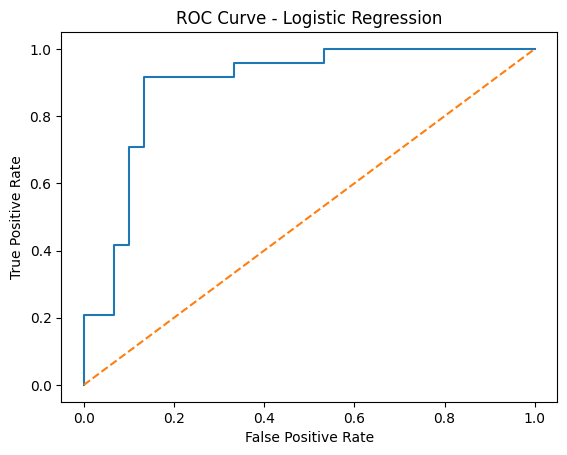

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()
